# Regresión Logistica o Clasificación Binaria

1. Preparación de datos
1. Ajuste de KNN al conjunto de entrenamiento
1. Predecir los resultados de las pruebas
1. Comprobar la precisión de los resultados
1. Realizar predicción

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# Imporar el dataset
dataset = pd.read_csv('user+data.csv')
X = dataset.iloc[:, [2,4]].values
y = dataset.iloc[:, 4].values

In [3]:
# Dividimos los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

classifer_model = LogisticRegression(random_state=0)
classifer_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = classifer_model.predict(X_test)

print("Precisión (Logistic Regression):", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
print("Matriz de Confusión:")
print(cm)

Precisión (Logistic Regression): 1.0
Matriz de Confusión:
[[68  0]
 [ 0 32]]


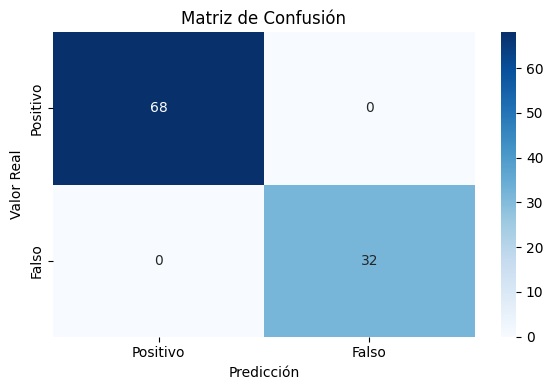

In [10]:
import seaborn as sns

labels = ['Positivo', 'Falso']

# Crear un heatmap con títulos
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()


|                   | Predicción: Clase 0       | Predicción: Clase 1       |
| ----------------- | ------------------------- | ------------------------- |
| **Real: Clase 0** | 68 (Verdaderos Negativos) | 0 (Falsos Positivos)      |
| **Real: Clase 1** | 0 (Falsos Negativos)      | 32 (Verdaderos Positivos) |


|                   | **Predicho Negativo** | **Predicho Positivo** |
| ----------------- | --------------------- | --------------------- |
| **Real Negativo** | 68 (🟢 TN)            | 0 (🔴 FP)             |
| **Real Positivo** | 0 (🔴 FN)             | 32 (🟢 TP)            |


Tu modelo identificó correctamente todos los positivos y negativos.

No cometió ningún error de clasificación.

Es un rendimiento perfecto, aunque debes verificar que no sea por un conjunto de datos muy pequeño o no representativo.

## Paso 5: Realizar predicciones del modelo

In [11]:
# Pedir datos al usuario
age = 25  # float(input("Ingresa la edad: "))
salary =  25000  # float(input("Ingresa el salario mensual: "))

# Crear array con los datos ingresados
input_data = [[age, salary]]

# Escalamos los valores reales antes de predecir
input_data_scaled = sc_X.transform(input_data)
predicted_class = classifer_model.predict(input_data_scaled)


print(f"Edad ingresada: {age}")
print(f"Salario ingresado: {salary}")
print("Precisión (Logistic Regression):", accuracy_score(y_test, y_pred))
print(f"La clase predicha para Purchased (Comprado) es: {predicted_class[0]}")

Edad ingresada: 25
Salario ingresado: 25000
Precisión (Logistic Regression): 1.0
La clase predicha para Purchased (Comprado) es: 1
